### Importing Libraries

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext jupyter_black

### Getting independent and dependent variables

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'SV Project.ipynb',
 'SVM Iris.ipynb',
 'YbzwCGnqTfS09yVqVb5H_online_shoppers_intention.xlsx']

In [4]:
online_sh = pd.read_excel(
    "YbzwCGnqTfS09yVqVb5H_online_shoppers_intention.xlsx"
)  # ,encoding='latin',on_bad_lines='skip')

In [5]:
online_sh

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
online_sh = online_sh.apply(lambda x: x.astype(int) if x.dtype == bool else x)

In [7]:
online_sh.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

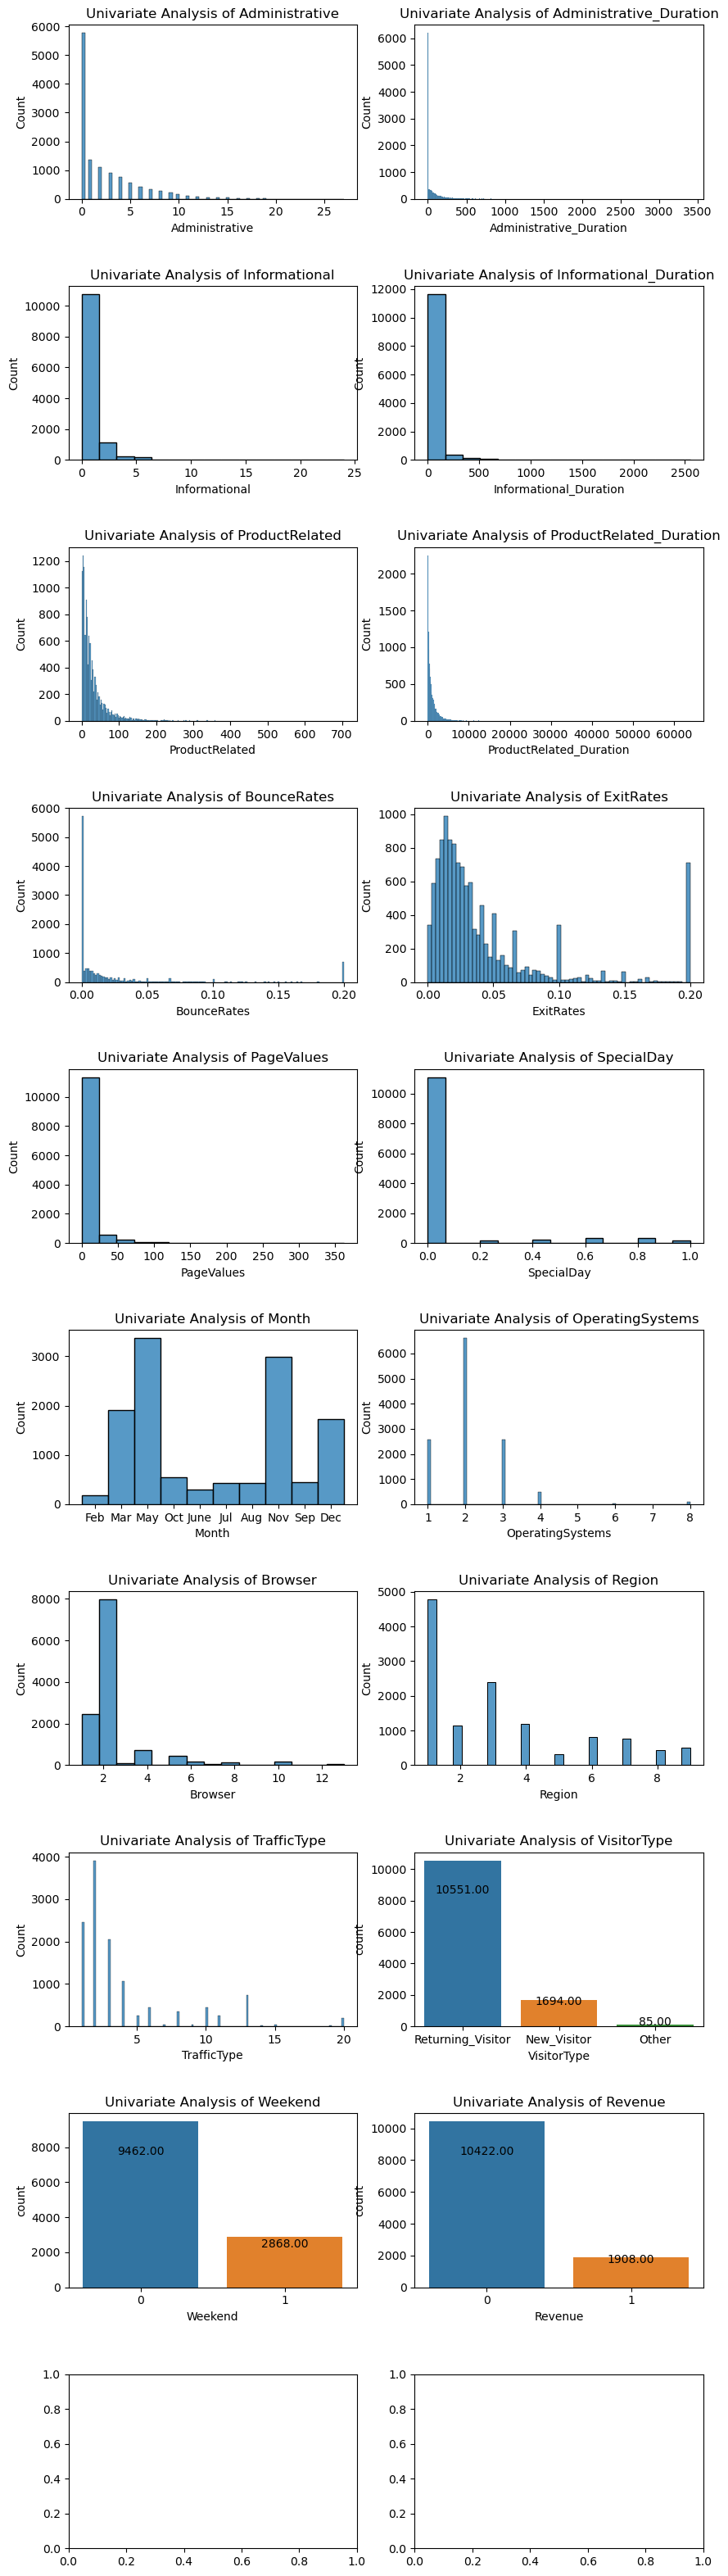

In [8]:
# Univariate plots
no_col = len(online_sh.columns)
fig, axes = plt.subplots(nrows=(no_col // 2 + 1), ncols=2, figsize=(10, 40))
for i, column in enumerate(online_sh.columns):
    if len(online_sh[column].unique()) > 3:
        ax = sns.histplot(online_sh[column], ax=axes[i // 2, i % 2])
    else:
        ax = sns.countplot(x=column, data=online_sh, ax=axes[i // 2, i % 2])
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(
                    f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2.0, height * 0.8),
                    ha="center",
                    va="top",
                    xytext=(0, 8),
                    color="black",
                    textcoords="offset points",
                )

    axes[i // 2, i % 2].set_title(f"Univariate Analysis of {column}")

    plt.subplots_adjust(hspace=0.5)

plt.show()

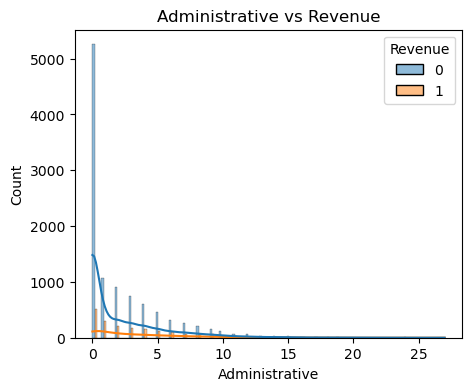

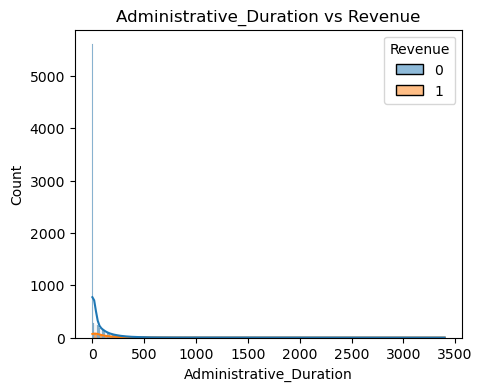

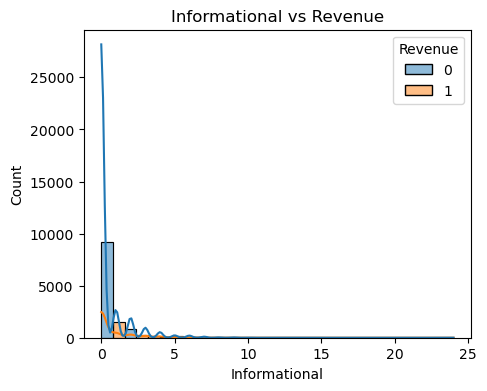

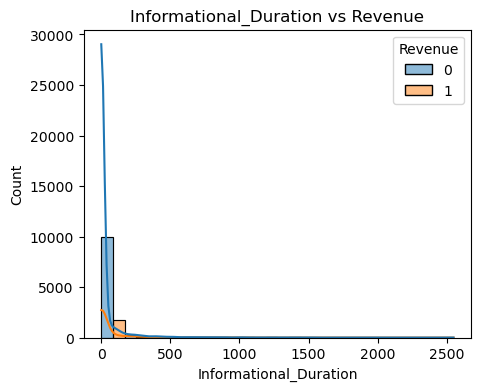

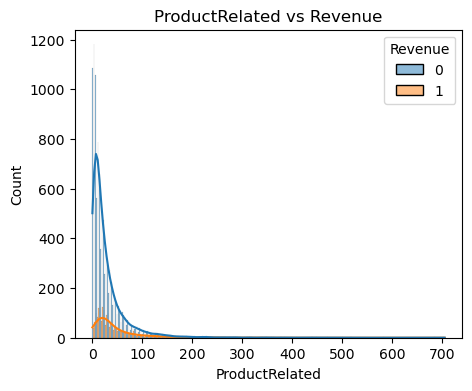

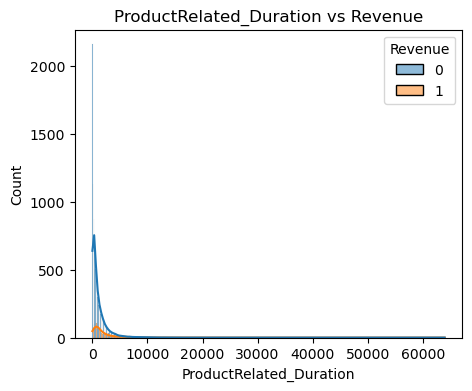

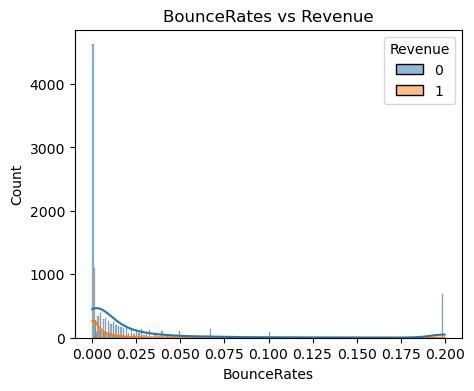

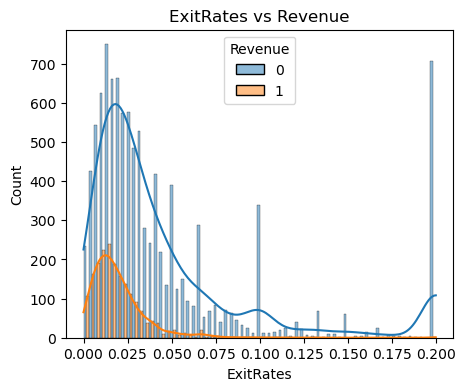

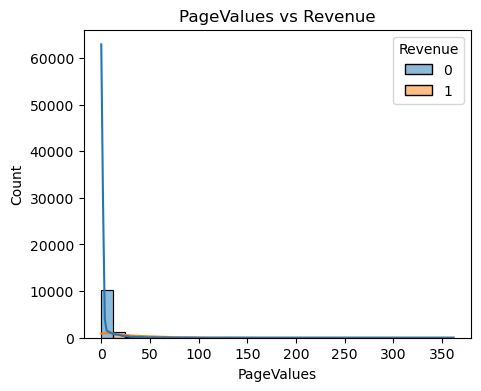

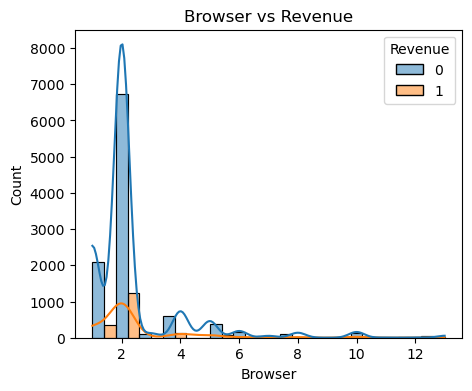

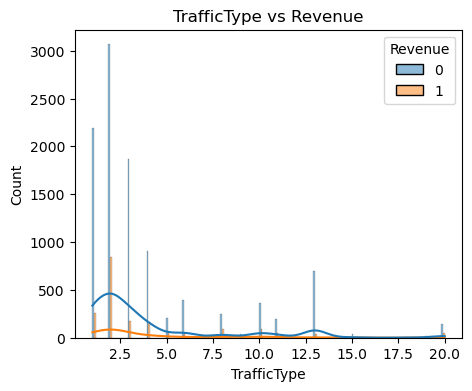

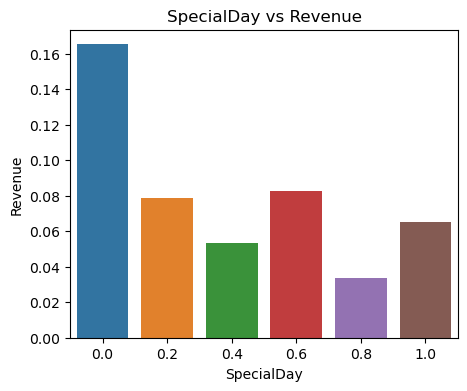

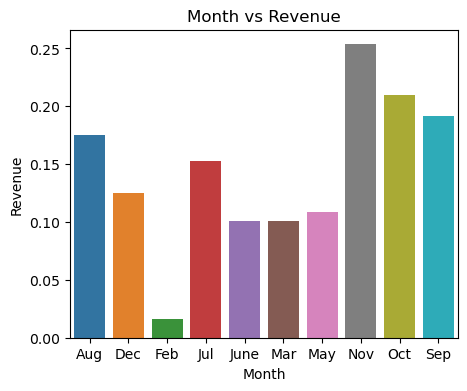

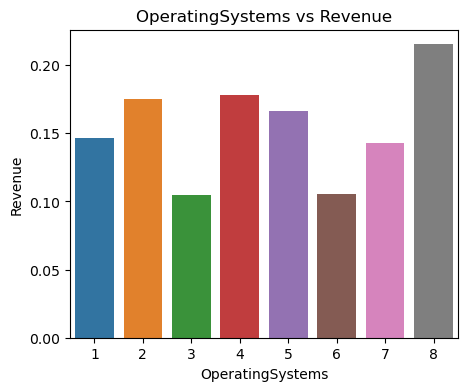

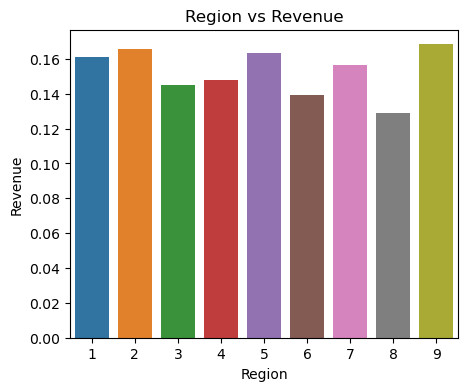

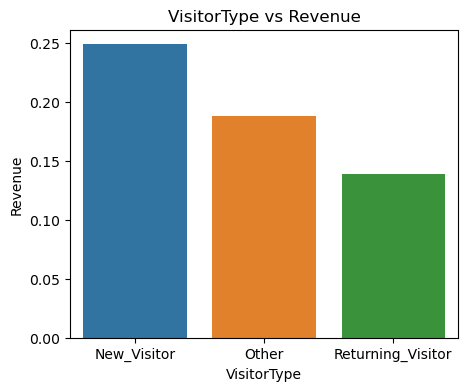

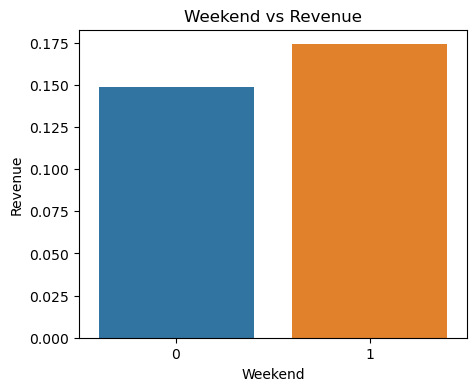

In [9]:
no_col = len(online_sh.columns)
continuous_vars = []
categorical_vars = []

for i, column in enumerate(online_sh.drop("Revenue", axis=1).columns):
    if len(online_sh[column].unique()) > 12:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    sns.histplot(
        x=var,
        data=online_sh[[f"{var}", "Revenue"]],
        hue="Revenue",
        multiple="dodge",
        kde=True,
    )

    plt.title(f"{var} vs Revenue")
    plt.show()

# Box plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    sns.barplot(
        x=var,
        y="Revenue",
        data=online_sh[[f"{var}", "Revenue"]]
        .groupby([f"{var}"], as_index=False)
        .mean(),
    )
    plt.title(f"{var} vs Revenue")
    plt.show()

plt.show()

In [10]:
def find_outliers(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=["float64", "int64"]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.8 * IQR
        upper_bound = Q3 + 2.8 * IQR
        outliers[column] = df[column][
            (df[column] < lower_bound) | (df[column] > upper_bound)
        ]
    return outliers

In [11]:
outliers_iqr = find_outliers(online_sh)
print("Outliers using IQR method:")
outliers_iqr

Outliers using IQR method:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
248,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.368516,NaN,NaN,NaN,NaN,NaN
502,18,NaN,6.0,762.500000,NaN,NaN,NaN,NaN,25.967020,NaN,NaN,4.0,NaN,NaN
611,16,NaN,6.0,147.866667,173.0,6255.017866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,17,754.109524,2.0,77.000000,NaN,NaN,NaN,NaN,2.080534,NaN,NaN,1.0,NaN,NaN
704,19,402.185714,4.0,116.000000,NaN,NaN,NaN,NaN,4.642000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316,16,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.504971,NaN,NaN,NaN,NaN,10.0
11598,16,NaN,5.0,66.875000,NaN,NaN,NaN,NaN,83.786512,NaN,NaN,NaN,NaN,NaN
11601,18,514.075000,4.0,67.500000,178.0,6630.479365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12178,26,1561.717567,9.0,503.722222,183.0,9676.093180,NaN,NaN,19.567464,NaN,NaN,NaN,NaN,13.0


In [12]:
online_sh_wo = online_sh[~online_sh.index.isin(outliers_iqr.index)]

In [13]:
online_sh_wo

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [14]:
online_sh_encoded = pd.get_dummies(online_sh_wo, drop_first=True)

corr_matrix = online_sh_encoded.corr()
correlation_with_target = corr_matrix["Revenue"].sort_values(ascending=False)
correlation_with_target

Revenue                          1.000000
PageValues                       0.498090
ProductRelated                   0.163752
ProductRelated_Duration          0.157644
Month_Nov                        0.153046
Administrative                   0.142824
Informational                    0.096162
Administrative_Duration          0.092889
Informational_Duration           0.070651
Month_Oct                        0.032178
Weekend                          0.030329
Browser                          0.025688
Month_Sep                        0.021238
VisitorType_Other                0.007891
Month_Jul                       -0.001197
TrafficType                     -0.005845
Region                          -0.010658
OperatingSystems                -0.016625
Month_June                      -0.022579
Month_Dec                       -0.031866
Month_Feb                       -0.047130
Month_Mar                       -0.064934
Month_May                       -0.077403
SpecialDay                      -0

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

final_features = online_sh_encoded.drop("Revenue", axis=1).copy()
# reusing code from previuos notes
final_features = final_features.apply(lambda x: x.astype(int) if x.dtype == bool else x)
final_features.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [16]:
while True:
    # Calculate VIF for each feature
    vif_data_opt = pd.DataFrame()
    vif_data_opt["Feature"] = final_features.columns
    vif_data_opt["VIF"] = [
        variance_inflation_factor(final_features.values, i)
        for i in range(final_features.shape[1])
    ]

    max_vif = vif_data_opt["VIF"].max()

    # Break the loop if all features have VIF below 10
    if max_vif < 10:
        break
    else:
        # Identify and remove the feature with the highest VIF
        remove = vif_data_opt.sort_values("VIF", ascending=False).iloc[0]["Feature"]
        final_features = final_features.drop(columns=[remove])

# Displaying the remaining features and their VIF values
vif_data_opt

,Feature,VIF
0,Administrative,2.802237
1,Administrative_Duration,1.980945
2,Informational,2.052733
3,Informational_Duration,1.738664
4,ProductRelated,6.352668
5,ProductRelated_Duration,5.751708
6,BounceRates,1.358060
7,PageValues,1.138188
8,SpecialDay,1.455490
9,OperatingSystems,6.850575


In [17]:
[col for col in final_features.columns if col not in vif_data_opt["Feature"].values]

[]

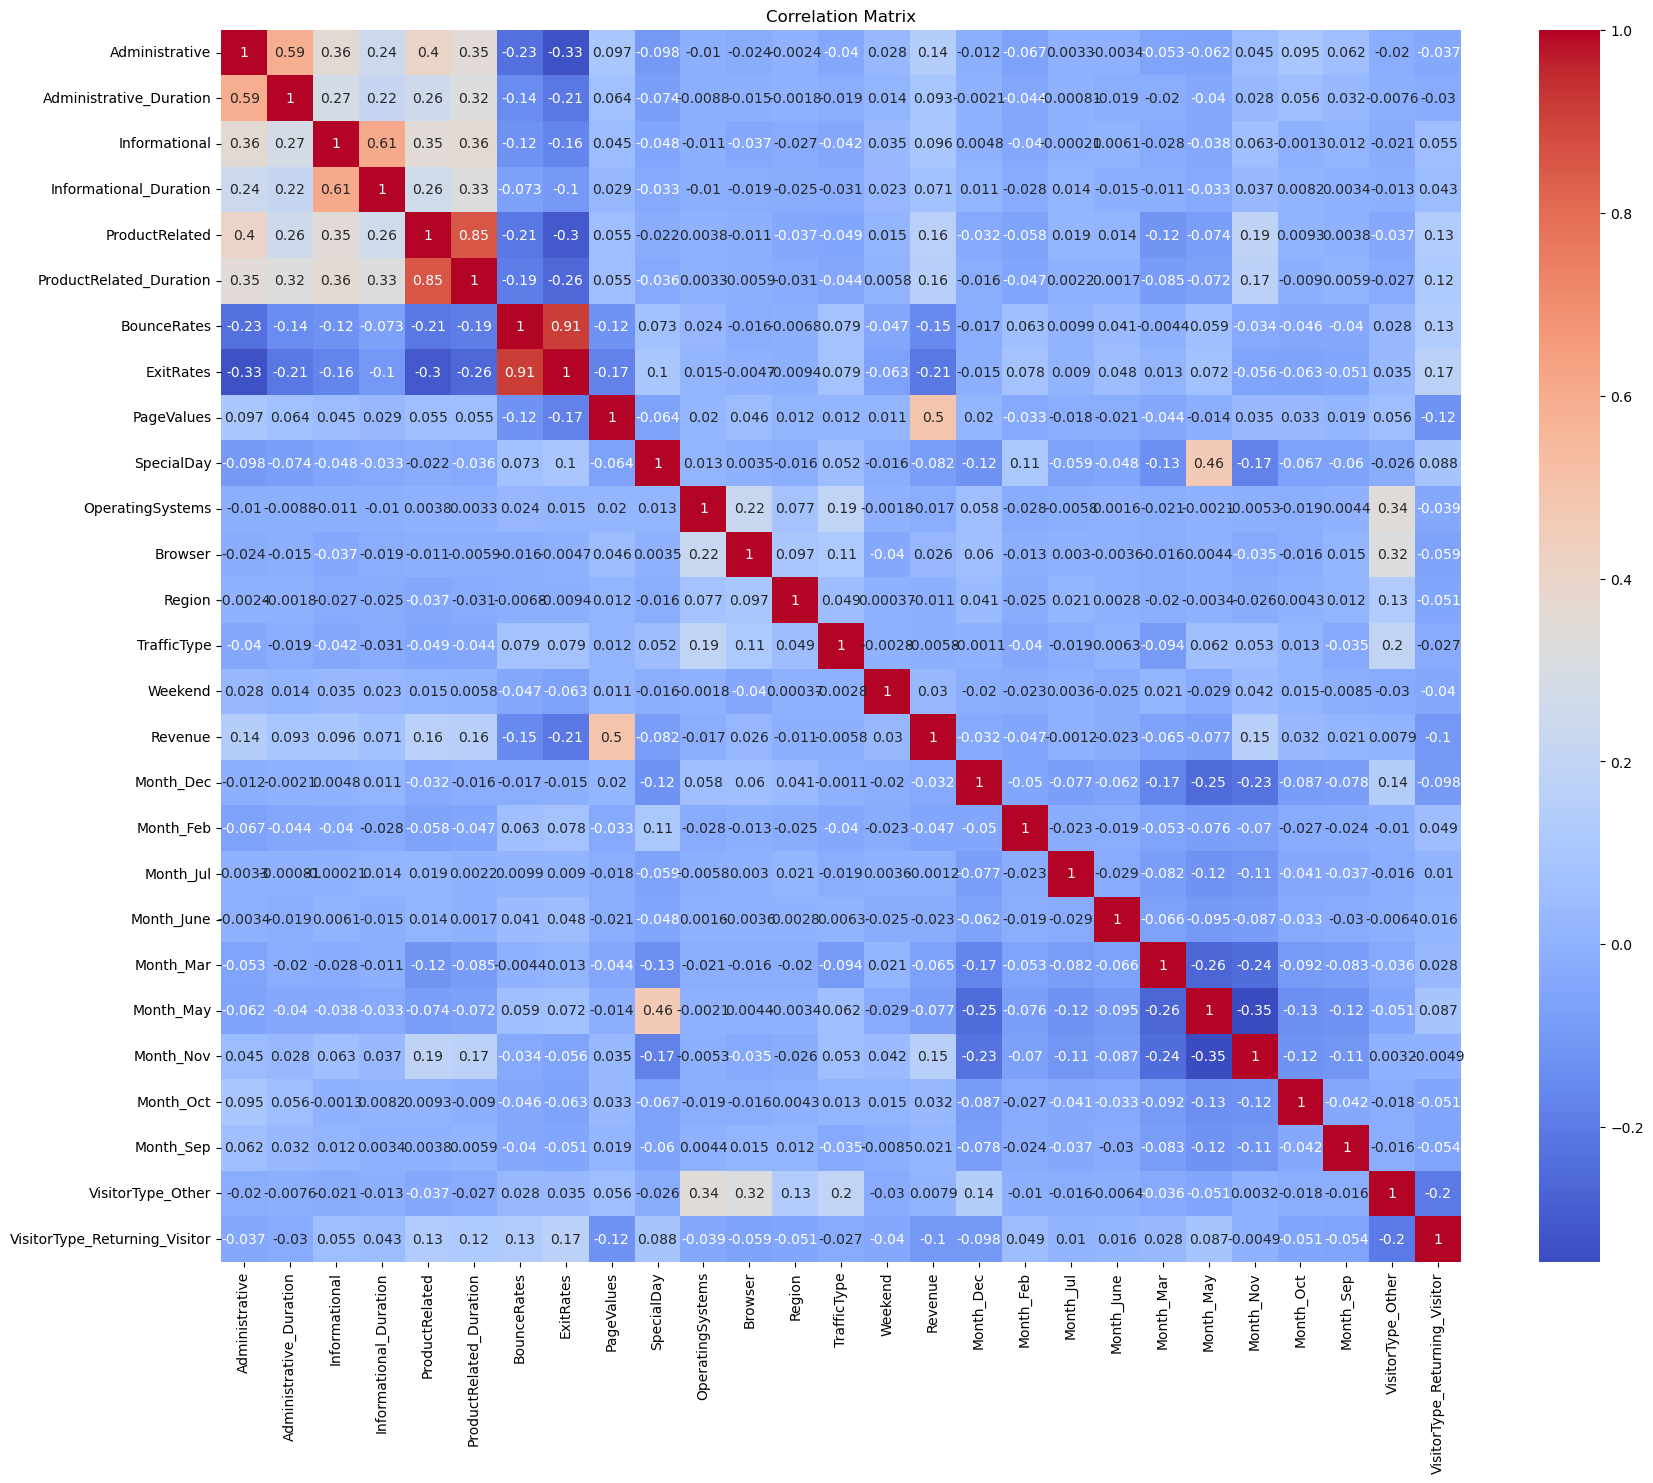

In [18]:
corr_matrix_w_Target = online_sh_encoded.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_w_Target, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = online_sh_encoded.drop("Revenue", axis=1)
y = online_sh_encoded["Revenue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the SVC model
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2068
           1       0.77      0.38      0.50       383

    accuracy                           0.88      2451
   macro avg       0.83      0.68      0.72      2451
weighted avg       0.87      0.88      0.87      2451

[[2024   44]
 [ 239  144]]


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "kernel": ["rbf"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],  # Only relevant for 'rbf' and 'poly' kernels
}
# "degree": [2, 3, 4],  # Only relevant for 'poly' kernel
# Initialize GridSearchCV and fit the model
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model}")
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Best Model: SVC(C=100)
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2068
           1       0.77      0.39      0.51       383

    accuracy                           0.89      2451
   macro avg       0.83      0.68      0.72      2451
weighted avg       0.88      0.89      0.87      2451

[[2023   45]
 [ 235  148]]


In [43]:
from scipy.stats import boxcox

import math

data = online_sh_encoded.copy()


def transform_column(column):
    transformed_column, _ = boxcox(column ) # suggested to be positive 
    return transformed_column


for column in online_sh_encoded.columns:
  
    if (
        column == "Revenue"
        or column in categorical_vars
        or len(online_sh_encoded[column].unique()) <= 12
    ):
        continue

    
    if pd.api.types.is_numeric_dtype(data[column]):
  
        skewness = data[column].skew()
        kurtosis = data[column].kurtosis()

        # If skewness is high (greater than 1) or kurtosis is high (greater than 3), transform the column
        if abs(skewness) > 1 or kurtosis > 3:
            data[column] = transform_column(data[column])
            print("Transformed {column}")

In [ ]:
data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop("Revenue", axis=1)
y = data["Revenue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.4)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf','poly','linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced', {0: 1, 1: 5},{0: 1, 1: 3},{0: 1, 1: 7}],
    "degree": [2, 3, 4]
}
# "degree": [2, 3, 4],  # Only relevant for 'poly' kernel
# Initialize GridSearchCV and fit the model
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    error_score="raise",
)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model}")
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Iterate over all candidates
for i, params in enumerate(grid_search.cv_results_['params']):

    model = grid_search.estimator.set_params(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"{i} Classification report for parameters: {params}")
    print(classification_report(y_test, y_pred))
    print("\n")
